<a href="https://colab.research.google.com/github/Srayasree/NST-PROJECT/blob/main/NST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**  IMPORT ALL IMPORTANT LIBRARIES**

In [ ]:
import tensorflow_hub as hub
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import cv2

**EXTRACTING STYLE TRANSFER MODEL FROM HUB**

In [ ]:
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

**1. Preprocess Image and Load**

In [ ]:
def load_image(img_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = img[tf.newaxis, :]
    return img

In [ ]:
content_image = load_image('PIC2.png')
style_image = load_image('PIC3.jpg')

**Visualize Output**

In [ ]:
content_image.shape

TensorShape([1, 1024, 1024, 3])

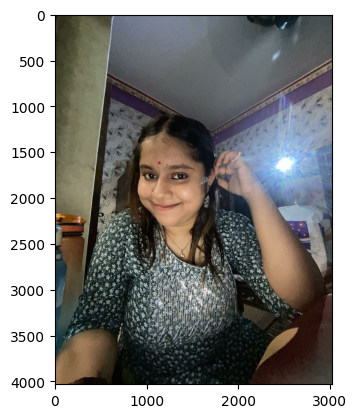

In [ ]:
plt.imshow(np.squeeze(style_image))
plt.show()

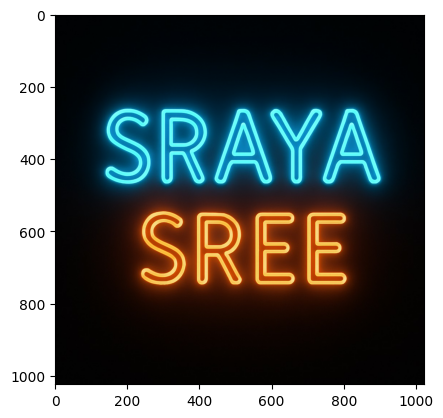

In [ ]:
plt.imshow(np.squeeze(content_image))
plt.show()

Stylize image **with style transfer model**

In [ ]:
stylized_image = model(tf.constant(content_image), tf.constant(style_image))[0]

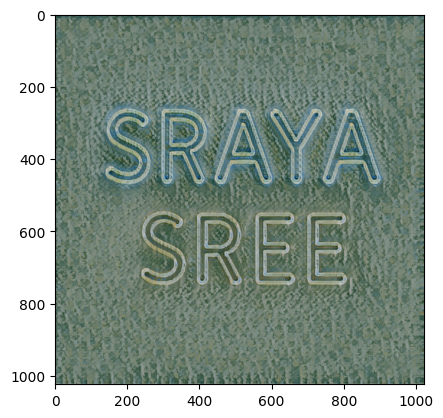

In [ ]:
plt.imshow(np.squeeze(stylized_image))
plt.show()

extract the image

In [ ]:
cv2.imwrite('generated_img.jpg', cv2.cvtColor(np.squeeze(stylized_image)*255, cv2.COLOR_BGR2RGB))

True